In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

data_original = pd.read_csv('calories.csv')
data_original = data_original.rename(columns={'Gender': 'Sex'})

TARGET_COL = 'Calories'

data_train.sample(5)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
394545,394545,female,51,168.0,75.0,4.0,76.0,38.8,14.0
260804,260804,female,60,181.0,75.0,21.0,108.0,40.6,140.0
454533,454533,male,77,176.0,86.0,24.0,109.0,40.8,218.0
151017,151017,male,43,191.0,94.0,13.0,94.0,40.0,68.0
356667,356667,male,21,187.0,87.0,10.0,94.0,39.9,39.0


In [2]:
def add_calories_burned(df):
    df['Calories_Burned'] = np.where(df['Sex'] == 'male', (-55.0969 + (0.6309 * df['Heart_Rate']) + (0.1988 * df['Weight']) + (0.2017 * df['Age'])) / 4.184 * df['Duration'], (-20.4022 + (0.4472 * df['Heart_Rate']) - (0.1263 * df['Weight']) + (0.074 * df['Age'])) / 4.184 * df['Duration'])

add_calories_burned(data_train)
add_calories_burned(data_original)

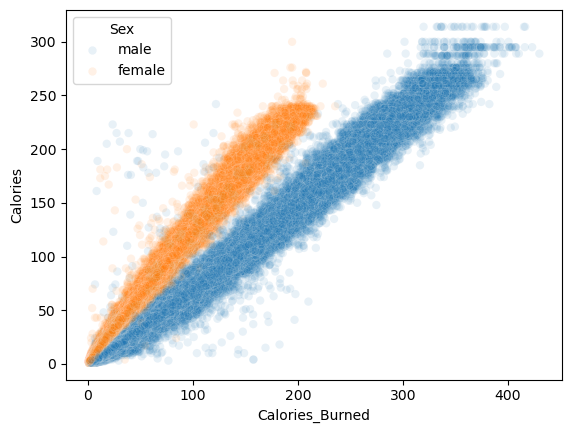

In [3]:
sc = sns.scatterplot(data=data_train, x='Calories_Burned', y=TARGET_COL, hue='Sex', alpha=0.1)

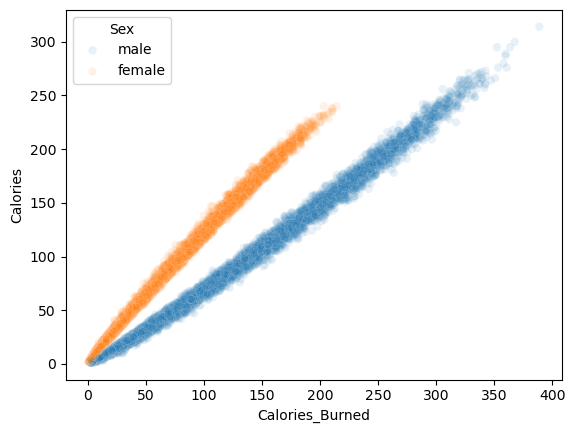

In [4]:
sc = sns.scatterplot(data=data_original, x='Calories_Burned', y=TARGET_COL, hue='Sex', alpha=0.1)

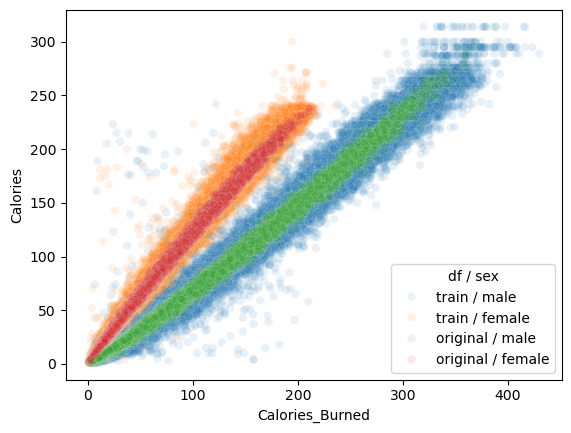

In [5]:
data_train['df / sex'] = np.where(data_train['Sex'] == 'male', 'train / male', 'train / female')
data_original['df / sex'] = np.where(data_original['Sex'] == 'male', 'original / male', 'original / female')

# Append the DataFrames
data_full = pd.concat([data_train, data_original], axis=0, ignore_index=True)

sc = sns.scatterplot(data=data_full, x='Calories_Burned', y=TARGET_COL, hue='df / sex', alpha=0.1)
plt.savefig('calories_burned.png')

In [6]:
def add_bmr(pd_df):
    BMR_male = 66.47 + pd_df['Weight']*13.75 + pd_df['Height']*5.003 - pd_df['Age']*6.755
    BMR_female = 655.1 + pd_df['Weight']*9.563 + pd_df['Height']*1.85 - pd_df['Age']*4.676
    pd_df['BMR'] = np.where(pd_df['Sex'] == 'male', BMR_male, BMR_female)

add_bmr(data_train)
add_bmr(data_original)

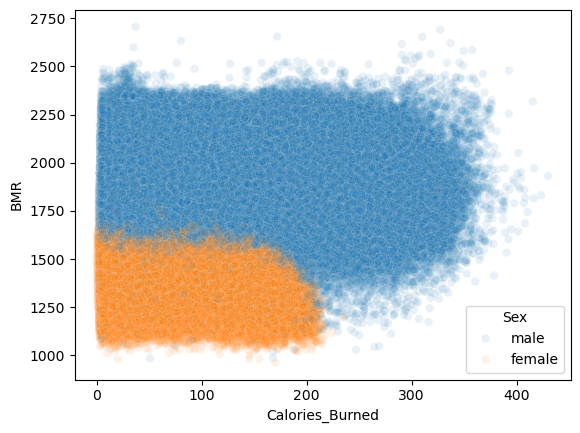

In [7]:
sc = sns.scatterplot(data=data_train, x='Calories_Burned', y='BMR', hue='Sex', alpha=0.1)